# Ocular Disease Intelligent Recognition (ODIR)
## Using Convolutional Neural Network to Predict Ocular Diseases

Project by: 
    22BAI1213 Joshua S Raju, 22BRS1372 Md Rameez Haider, 22BAI1427 Shubham Yadav, 22BAI1425 Anton K Sam

This particular CNN model aims to predict three types of Ocular Diseases:
1. Cataract
2. Diabetic Retinopathy
3. Glaucoma

Dataset : https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k

## Importing Dependencies

In [1]:
import numpy as np
import os

import imghdr

import cv2
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Reading Image Data

In [4]:
data_dir = 'DataSet'
os.listdir(data_dir)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [5]:
img_exts = ['jpeg',  'jpg', 'png']
img_exts

['jpeg', 'jpg', 'png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        img_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(img_path)
            ext = imghdr.what(img_path)
            if ext not in img_exts:
                print('Image not in appropriate fromat {}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with the image {}'.format(img_path))

In [7]:
classes = ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal']
classes

['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal']

## Classifying Image Data into a Classified Image Dataset

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 4217 files belonging to 4 classes.


In [9]:
batch = data.as_numpy_iterator().next()
len(batch)

2

## Displaying Images from Dataset

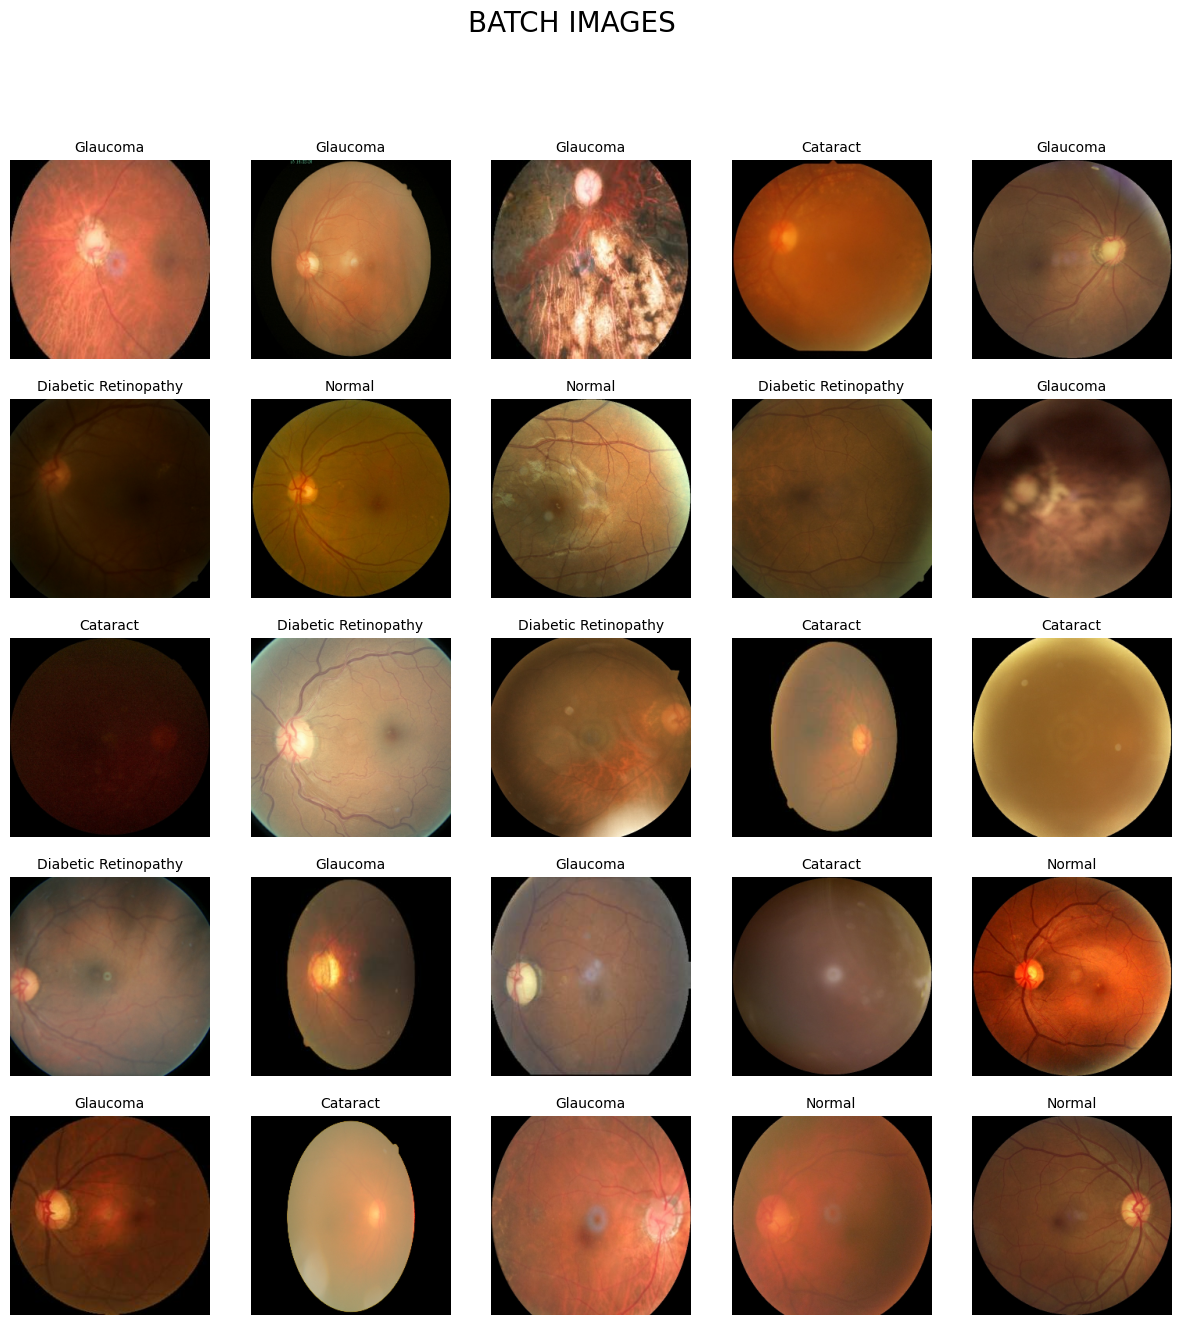

In [10]:
fig, axs = plt.subplots(5,5, figsize=(15,15))
for idx, img in enumerate(batch[0][:25]):
    row = idx // 5
    col = idx % 5
    axs[row, col].imshow(img.astype(int))
    axs[row, col].axis('off')
    axs[row, col].set_title(classes[batch[1][idx]], fontsize = 10)
    fig.suptitle('BATCH IMAGES', fontsize=20)

## Image Normalization

In [11]:
data.as_numpy_iterator().next()[0].max(), data.as_numpy_iterator().next()[0].min()

(255.0, 0.0)

In [12]:
data = data.map(lambda x, y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()[0]

array([[[[0.00686275, 0.01470588, 0.00294118],
         [0.00392157, 0.01176471, 0.        ],
         [0.00196078, 0.00882353, 0.        ],
         ...,
         [0.00686275, 0.01470588, 0.00294118],
         [0.00392157, 0.01176471, 0.00098039],
         [0.00098039, 0.00784314, 0.        ]],

        [[0.00392157, 0.01176471, 0.        ],
         [0.00686275, 0.01470588, 0.00294118],
         [0.00784314, 0.01568628, 0.00392157],
         ...,
         [0.00490196, 0.0127451 , 0.00098039],
         [0.00588235, 0.01372549, 0.00196078],
         [0.00392157, 0.01176471, 0.        ]],

        [[0.00882353, 0.01666667, 0.00490196],
         [0.00490196, 0.0127451 , 0.00098039],
         [0.00784314, 0.01568628, 0.00392157],
         ...,
         [0.00490196, 0.0127451 , 0.00098039],
         [0.00392157, 0.01176471, 0.        ],
         [0.00392157, 0.01176471, 0.        ]],

        ...,

        [[0.00588235, 0.01372549, 0.00294118],
         [0.01078431, 0.01862745, 0.00686275]

In [14]:
data.as_numpy_iterator().next()[0].max(), data.as_numpy_iterator().next()[0].min()

(1.0, 0.0)

In [15]:
len(data)

132

## Splitting Dataset 

In [16]:
training_size = int(len(data)*0.7)
val_size = int(len(data)*0.2) + 1
test_size = int(len(data)*0.1)

training_size + val_size + test_size

132

In [17]:
training_data = data.take(training_size)
val_data = data.skip(training_size).take(val_size)
test_data =  data.skip(training_size + val_size).take(test_size)

## Creating CNN Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [38]:
model = Sequential()

In [20]:
data.as_numpy_iterator().next()[0][0].shape

(256, 256, 3)

In [39]:
model.add(Conv2D(32, (3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

In [40]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

## Training The Model

In [24]:
log_dir = 'LogDir'

In [25]:
tensorflowboard_callback = tf.keras.callbacks.TensorBoard(log_dir)

In [41]:
hist = model.fit(training_data, epochs = 30, validation_data = val_data, callbacks=[tensorflowboard_callback] )

Epoch 1/30
92/92 [==============================] - 15s 147ms/step - loss: 1.3954 - accuracy: 0.3237 - val_loss: 1.3745 - val_accuracy: 0.3657
Epoch 2/30
92/92 [==============================] - 14s 148ms/step - loss: 1.2442 - accuracy: 0.4501 - val_loss: 1.2905 - val_accuracy: 0.5150
Epoch 3/30
92/92 [==============================] - 14s 149ms/step - loss: 1.1394 - accuracy: 0.5075 - val_loss: 1.1615 - val_accuracy: 0.5370
Epoch 4/30
92/92 [==============================] - 14s 148ms/step - loss: 0.9784 - accuracy: 0.5781 - val_loss: 0.9688 - val_accuracy: 0.6134
Epoch 5/30
92/92 [==============================] - 14s 149ms/step - loss: 0.8778 - accuracy: 0.6298 - val_loss: 0.8670 - val_accuracy: 0.6505
Epoch 6/30
92/92 [==============================] - 14s 149ms/step - loss: 0.8065 - accuracy: 0.6488 - val_loss: 0.7831 - val_accuracy: 0.6759
Epoch 7/30
92/92 [==============================] - 14s 151ms/step - loss: 0.7609 - accuracy: 0.6698 - val_loss: 0.7358 - val_accuracy: 0.6794

In [42]:
hist.history

{'loss': [1.3954238891601562,
  1.2441887855529785,
  1.1393601894378662,
  0.9784086346626282,
  0.877768337726593,
  0.806509256362915,
  0.7609286904335022,
  0.7318545579910278,
  0.7094113826751709,
  0.6746441125869751,
  0.6506511569023132,
  0.6403102874755859,
  0.6009330153465271,
  0.6071056127548218,
  0.5739675760269165,
  0.5536245107650757,
  0.5497702956199646,
  0.5306658744812012,
  0.5148444771766663,
  0.49776700139045715,
  0.5014289021492004,
  0.486023873090744,
  0.48702073097229004,
  0.47150716185569763,
  0.47999370098114014,
  0.4588976204395294,
  0.48870986700057983,
  0.44429492950439453,
  0.4394688308238983,
  0.41732510924339294],
 'accuracy': [0.32370924949645996,
  0.450067937374115,
  0.507472813129425,
  0.578125,
  0.629755437374115,
  0.648777186870575,
  0.6698369383811951,
  0.67357337474823,
  0.695652186870575,
  0.7072010636329651,
  0.726222813129425,
  0.735733687877655,
  0.7540760636329651,
  0.741847813129425,
  0.77004075050354,
  0.77

## Visualization of Metrics

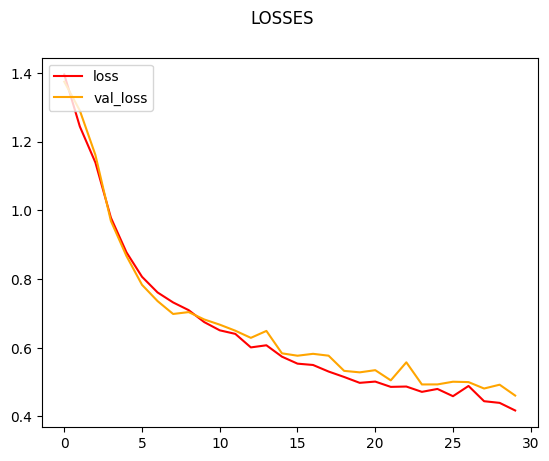

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
plt.legend(loc = 'upper left')
plt.suptitle('LOSSES')
plt.show()

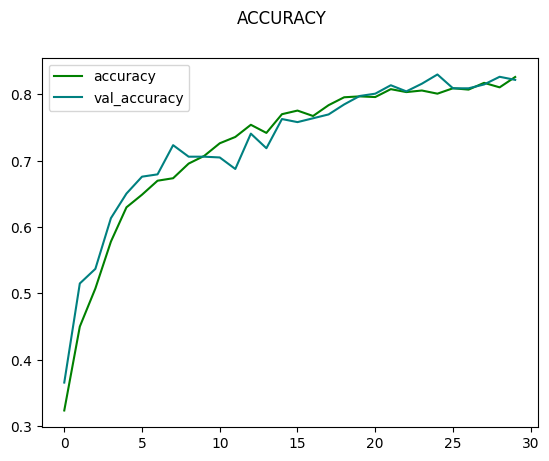

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'teal', label = 'val_accuracy')
plt.legend(loc = 'upper left')
plt.suptitle('ACCURACY')
plt.show()